In [1]:
# =======================
# POWER CONSUMPTION PREDICTION USING RGB VALUES
# =======================

# Install dependencies (only needed in Google Colab)
!pip install scikit-learn streamlit joblib pandas numpy matplotlib seaborn openpyxl pyngrok

# -----------------------
# IMPORT LIBRARIES
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import joblib

# -----------------------
# LOAD DATA
# -----------------------
file_path = "RGB Color and Power Consumption Analysis (1).xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

print("Data Loaded Successfully!")
print(df.head())

Data Loaded Successfully!
     R    G    B  Original Brightness  Ambient Lux  Temperature  \
0   10  164  174              119.094           16           28   
1   91  197  171              162.342            0           37   
2  188  232  148              209.268           60           24   
3  122  253  151              202.203           20           20   
4  119  192  196              170.629            0           27   

  Temperature Zone  Adjusted Brightness Dominant Color  Estimated Power (W)  \
0              Hot                99.47            Red                 1.95   
1              Hot               102.28           Blue                 2.01   
2             Mild               254.47          Green                 4.99   
3             Mild               194.11          Green                 3.81   
4              Hot               124.56          Green                 2.44   

   Low Power Brightness  Low Power (W)  Power Saved (W)  Charging Brightness  \
0               

In [ ]:
# -----------------------
# SELECT FEATURES
# -----------------------
features = ['R', 'G', 'B', 'Original Brightness', 'Ambient Lux', 'Temperature']
target = 'Estimated Power (W)'

X = df[features]
y = df[target]

# -----------------------
# SPLIT DATA
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# SCALE FEATURES
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------
# DEFINE MODELS
# -----------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
}

# -----------------------
# TRAIN & EVALUATE
# -----------------------
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R2": r2, "RMSE": rmse, "MAE": mae}
    print(f"{name} -> R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

Linear Regression -> R²: 0.979, RMSE: 0.189, MAE: 0.143
Random Forest -> R²: 0.922, RMSE: 0.367, MAE: 0.311
Gradient Boosting -> R²: 0.960, RMSE: 0.263, MAE: 0.206
Neural Network -> R²: 0.918, RMSE: 0.376, MAE: 0.263



🔹 Model Comparison:
                         R2      RMSE       MAE
Linear Regression  0.979318  0.188860  0.142598
Gradient Boosting  0.959794  0.263320  0.205707
Random Forest      0.922097  0.366537  0.311355
Neural Network     0.917910  0.376258  0.263178


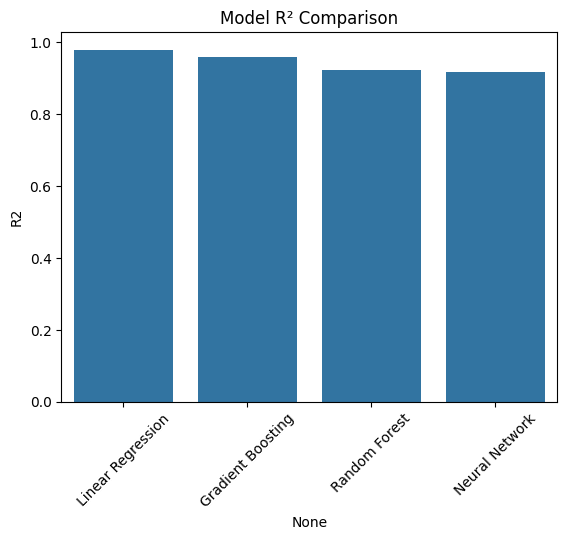

In [ ]:
# -----------------------
# COMPARE MODELS
# -----------------------
result_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("\n🔹 Model Comparison:")
print(result_df)

sns.barplot(x=result_df.index, y=result_df["R2"])
plt.title("Model R² Comparison")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# -----------------------
# GRID SEARCH ON BEST MODEL (Random Forest)
# -----------------------
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluate best model
y_pred_best = best_model.predict(X_test_scaled)
print("\n🔹 Final Random Forest Model Performance:")
print("R²:", r2_score(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("MAE:", mean_absolute_error(y_test, y_pred_best))

# Save model and scaler
joblib.dump(best_model, "power_predictor.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and Scaler saved successfully!")


🔹 Final Random Forest Model Performance:
R²: 0.9076844841845966
RMSE: 0.39900435686124336
MAE: 0.33582229024899996

Model and Scaler saved successfully!


In [ ]:
from pyngrok import ngrok
import os
from google.colab import userdata

NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Kill any existing tunnels
ngrok.kill()

# Run Streamlit on port 8501
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Create a public URL
public_url = ngrok.connect(addr=8501)
print("🌐 Streamlit App URL:", public_url)

🌐 Streamlit App URL: NgrokTunnel: "https://unflaked-paraxial-mitzie.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
ngrok.kill()